In [32]:
#Data Preprocessing

#Load and Explore the Dataset:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())  # Statistical summary

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [31]:
#Handle Missing Values and Normalize Data:
from sklearn.preprocessing import StandardScaler
print(data.isnull().sum())  # Check for missing values
# Standardize numerical data
scaler = StandardScaler()
numerical_features = ['BMI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [25]:
#Feature Selection

#Split Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Handle Class Imbalance
#Use SMOTE to address class imbalance:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
#Model Selection and Training
#Choose Logistic Regression due to its interpretability and efficiency for classification tasks.

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with class weights balanced and train the model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy: 0.6452617470829392
Confusion Matrix:
 [[28322  7216  7257]
 [  274   292   378]
 [ 1113  1760  4124]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42795
         1.0       0.03      0.31      0.06       944
         2.0       0.35      0.59      0.44      6997

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736



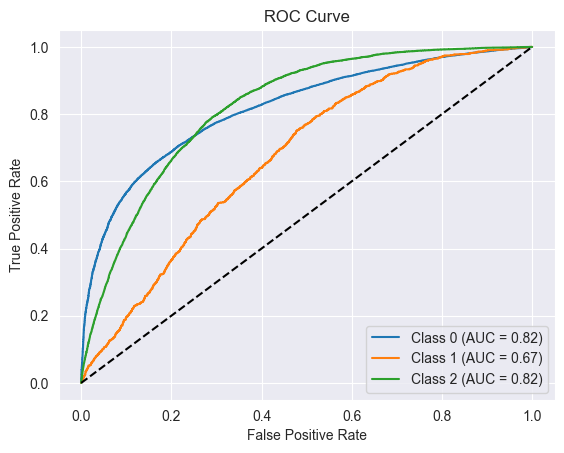

In [28]:
#Model Evaluation
#Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC AUC.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions and evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# ROC Curve for each class
y_pred_proba = model.predict_proba(X_test)
for i in range(y_pred_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

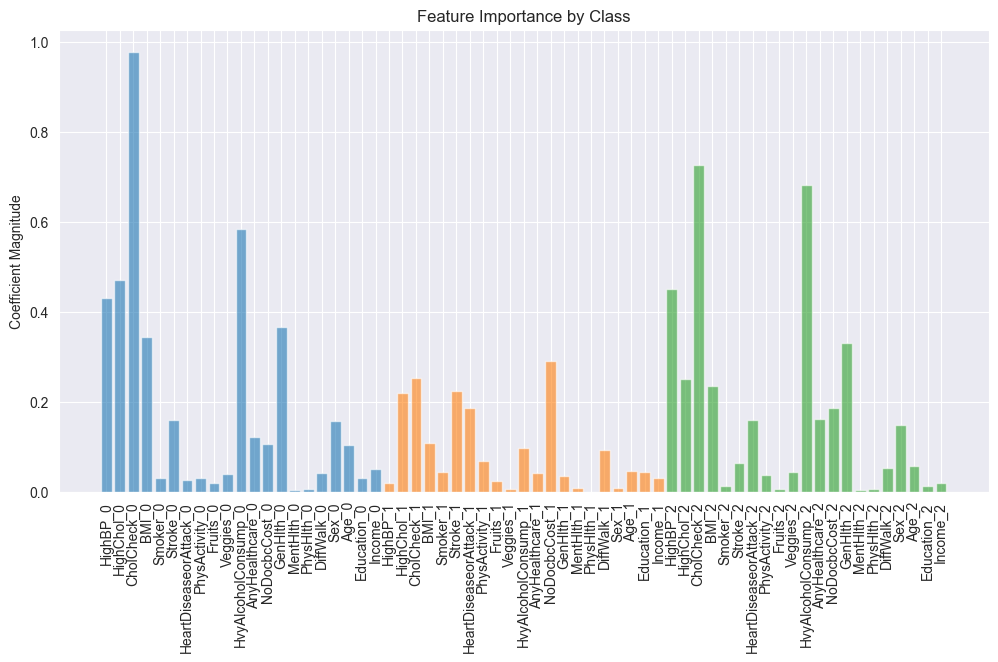

In [29]:
#Feature Importance Visualization
# Visualize feature importance using coefficient magnitudes from Logistic Regression.
#Logistic Regression is suitable for multi-class classification and provides interpretable results through feature coefficients
import numpy as np

# Feature importance based on coefficients
feature_importance = np.abs(model.coef_)
feature_names = X.columns

plt.figure(figsize=(12, 6))
for i in range(feature_importance.shape[0]):
    plt.bar(feature_names + f'_{i}', feature_importance[i], alpha=0.6)

plt.title('Feature Importance by Class')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Magnitude')
plt.show()